# Machine Learning: Decision Trees

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/drug200.csv"
)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [7]:
df.shape

(200, 6)

## Data Cleaning

In [6]:
# Impute/remove null values
null_counts = df.isnull().sum()
print("Null Value Counts:\n", null_counts)

Null Value Counts:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


Since there are no null values, we don't need to perform any imputation or removal of null values in this case. Our dataset seems to be clean and ready for analysis as is.

In [8]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()
print("Shape of cleaned DataFrame:", df_cleaned.shape)

Shape of cleaned DataFrame: (200, 6)


Our dataset didn't contain any duplicate rows to begin with. 

### EDA

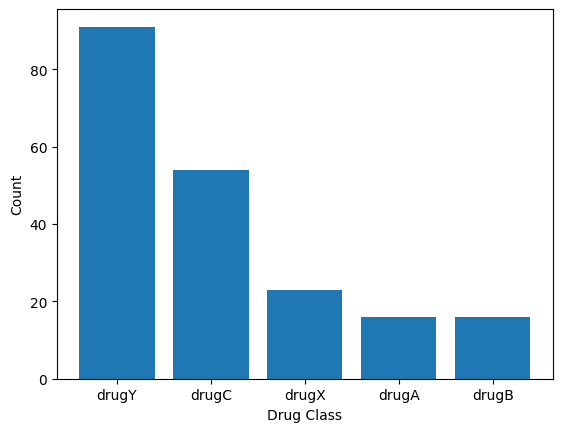

In [10]:
# Plot features/columns to analize information

import matplotlib.pyplot as plt

# Create a bar plot of the drug classes
plt.bar(df["Drug"].unique(), df["Drug"].value_counts())
plt.xlabel("Drug Class")
plt.ylabel("Count")
plt.show()

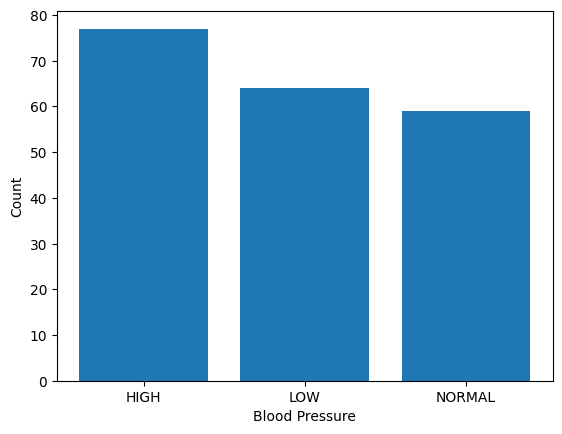

In [13]:
import seaborn as sns

# Create a bar plot of the blood pressure
plt.bar(df["BP"].unique(), df["BP"].value_counts())
plt.xlabel("Blood Pressure")
plt.ylabel("Count")
plt.show()

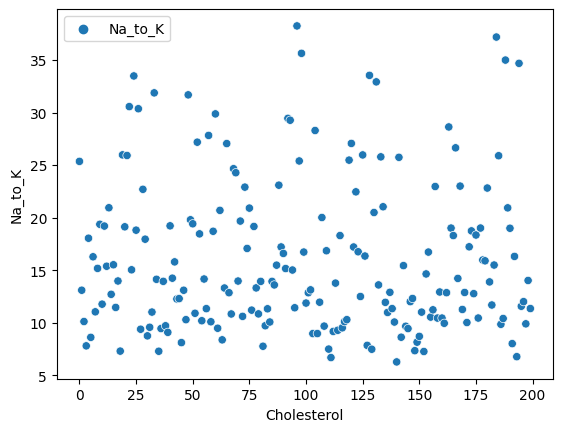

In [17]:
# Create a scatter plot of the cholesterol and Na_to_K
cholesterol_and_na_to_k = [df["Cholesterol"], df["Na_to_K"]]
sns.scatterplot(cholesterol_and_na_to_k)
plt.xlabel("Cholesterol")
plt.ylabel("Na_to_K")
plt.show()

### Encoding

In [ ]:
# Convert categorical variables into numerical

### Splitting

In [ ]:
# Split dataset into training and testing

## Finding best max depth value

In [ ]:
# Iterate overt different max depth values to get the best Decision tree model using different metrics

In [ ]:
# Get predictions over testing dataset using the best model

## Feature Importance

In [ ]:
# Plot feature importance

## Plot the decision tree

In [ ]:
# Plot the decision tree

## Evaluation Metric

In [ ]:
# Evaluate different metrics over testing using the best model